In [1]:
import pyxdf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data, header = pyxdf.load_xdf('data/sample.xdf')
print(data[0]['info']['name'])
print("Shape : ", data[0]['time_series'].shape)
print("Effective sampling rate : ", data[0]['info']['effective_srate'])

['GazepointEyeTracker']
Shape :  (1997, 36)
Effective sampling rate :  148.1501972125103


In [3]:
d = data[0]
headers = ['CNT', 'EPOCHTIME', 'TIME', 'TIME_TICK', 'FPOGX', 'FPOGY', 'FPOGS', 'FPOGD', 'FPOGID', 'FPOGV', 'LPOGX', 'LPOGY', 'LPOGV', 'RPOGX', 'RPOGY', 'RPOGV', 'BPOGX', 'BPOGY', 'BPOGV', 'LPCX', 'LPCY', 'LPD', 'LPS', 'LPV', 'RPCX', 'RPCY', 'RPD', 'RPS', 'RPV', 'CX', 'CY', 'CS', 'BKID', 'BKDUR', 'BKPMIN', 'USER']
et = pd.DataFrame(data[0]['time_series'], columns=headers)
et.insert(0, 'timestamp', data[0]['time_stamps'], allow_duplicates = False)
et

,timestamp,CNT,EPOCHTIME,TIME,TIME_TICK,FPOGX,FPOGY,FPOGS,FPOGD,FPOGID,...,RPD,RPS,RPV,CX,CY,CS,BKID,BKDUR,BKPMIN,USER
0,9908.145492,111221.0,1.651939e+09,8340.722656,9.908154e+10,1.11056,1.17552,8339.851562,0.87109,1707.0,...,24.851101,0.95487,1.0,0.08854,0.83889,0.0,0.0,0.0,19.0,0.0
1,9908.152242,111222.0,1.651939e+09,8340.728516,9.908159e+10,1.08624,1.14363,8339.851562,0.87109,1707.0,...,25.106171,0.97641,1.0,0.08854,0.83889,0.0,0.0,0.0,19.0,0.0
2,9908.158992,111223.0,1.651939e+09,8340.736328,9.908167e+10,0.99035,1.02727,8339.851562,0.87109,1707.0,...,24.736870,0.99795,1.0,0.08854,0.83889,0.0,0.0,0.0,19.0,0.0
3,9908.165742,111224.0,1.651939e+09,8340.742188,9.908173e+10,0.96127,0.98494,8339.851562,0.87109,1707.0,...,25.004000,1.01949,1.0,0.00000,0.53889,0.0,0.0,0.0,19.0,0.0
4,9908.172492,111225.0,1.651939e+09,8340.749023,9.908181e+10,0.86484,0.85058,8339.851562,0.87109,1707.0,...,25.206169,1.01949,1.0,0.00000,0.53889,0.0,0.0,0.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,9921.591389,113213.0,1.651939e+09,8354.193359,9.921624e+10,1.12521,1.16851,8353.569336,0.62402,1766.0,...,23.720341,0.91205,1.0,0.65208,1.42130,0.0,0.0,0.0,15.0,0.0
1993,9921.598139,113214.0,1.651939e+09,8354.199219,9.921630e+10,1.12546,1.16873,8353.569336,0.62988,1766.0,...,23.959801,0.89965,1.0,0.65208,1.42130,0.0,0.0,0.0,15.0,0.0
1994,9921.604889,113215.0,1.651939e+09,8354.206055,9.921637e+10,1.12559,1.16900,8353.569336,0.63672,1766.0,...,23.955099,0.89965,1.0,0.65208,1.42037,0.0,0.0,0.0,15.0,0.0
1995,9921.611639,113216.0,1.651939e+09,8354.212891,9.921643e+10,1.12516,1.16912,8353.569336,0.64355,1766.0,...,23.737240,0.91205,1.0,0.65208,1.42037,0.0,0.0,0.0,15.0,0.0


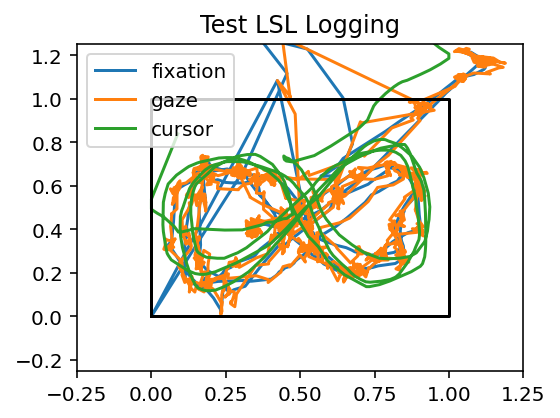

In [4]:
plt.figure(figsize=(4,3), dpi=144)
plt.plot(et['FPOGX'], et['FPOGY'], label='fixation')
plt.plot(et['BPOGX'], et['BPOGY'], label='gaze')
plt.plot(et['CX'], et['CY'], label='cursor')
plt.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], c='k')
plt.xlim(-0.25, 1.25)
plt.ylim(-0.25, 1.25)

plt.title("Test LSL Logging")
plt.legend()
plt.show()